In [20]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")

In [21]:
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")


In [22]:
head(POR_taxo_4_analysis %>%
 rownames_to_column  %>%
  mutate( ASVs= rowname)  %>% column_to_rownames("rowname"))

,domain,phylum,class,order,family,genus,species,ASVs
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
ASV_7337,Bacteria,Proteobacteria,Gammaproteobacteria,OM182 clade,NA,NA,NA,ASV_7337
ASV_5689,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,NA,NA,ASV_5689
ASV_13972,Bacteria,Planctomycetota,Planctomycetes,NA,NA,NA,NA,ASV_13972
ASV_6599,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,Bythopirellula,NA,ASV_6599
ASV_4986,Bacteria,Proteobacteria,Gammaproteobacteria,OM182 clade,NA,NA,NA,ASV_4986
ASV_6448,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,Rhodopirellula,NA,ASV_6448


In [23]:
taxo_mat <- POR_taxo_4_analysis %>%
  rownames_to_column %>%
  filter(rowname != 'ASV_2') %>%
column_to_rownames("rowname")  %>%
  mutate(domain = ifelse(row.names(.) == "ASV_5", "ASV_5:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_5", "ASV_5:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_5", "ASV_5:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_5", "ASV_5:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_5", "ASV_5:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_5", "ASV_5:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_5", "ASV_5:core", species)) %>%
 mutate(domain = ifelse(row.names(.) == "ASV_6", "ASV_6:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_6", "ASV_6:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_6", "ASV_6:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_6", "ASV_6:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_6", "ASV_6:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_6", "ASV_6:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_6", "ASV_6:core", species)) %>%
mutate(class = ifelse(row.names(.) == "ASV_7", "SAR324:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_7", "SAR324:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_7", "SAR324:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_7", "SAR324:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_7", "SAR324:core", species)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", species))

In [24]:
taxo_mat %>% rownames_to_column %>% filter(rowname %in% c('ASV_5','ASV_6','ASV_7','ASV_23', 'ASV_2'))

rowname,domain,phylum,class,order,family,genus,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_5,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core
ASV_6,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core
ASV_7,Bacteria,SAR324 clade(Marine group B),SAR324:core,SAR324:core,SAR324:core,SAR324:core,SAR324:core
ASV_23,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobiaceae:core,Cyanobiaceae:core


In [25]:
dim(taxo_mat)
head(taxo_mat)

[1] 27533     7

,domain,phylum,class,order,family,genus,species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_7337,Bacteria,Proteobacteria,Gammaproteobacteria,OM182 clade,NA,NA,NA
ASV_5689,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,NA,NA
ASV_13972,Bacteria,Planctomycetota,Planctomycetes,NA,NA,NA,NA
ASV_6599,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,Bythopirellula,NA
ASV_4986,Bacteria,Proteobacteria,Gammaproteobacteria,OM182 clade,NA,NA,NA
ASV_6448,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,Rhodopirellula,NA


In [26]:
taxo_mat %>% filter(species=="NA")

domain,phylum,class,order,family,genus,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [27]:
sapply(taxo_mat, function(x) sum(is.na(x)))

domain  phylum   class   order  family   genus species 
   6406    9290   10067   14465   16305   20863   27529

In [28]:

meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(as.matrix(taxo_mat))
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27533 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 27533 taxa by 7 taxonomic ranks ]

In [29]:
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps)
# new phyloseq object with just the taxa you kept.
ps_fill_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27486 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 27486 taxa by 7 taxonomic ranks ]

In [41]:
ps_fill = filter_taxa(ps_fill_euk, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

In [42]:
core_members(ps_fill, detection = 0, prevalence = 99/100)

[1] "ASV_5"  "ASV_6"  "ASV_7"  "ASV_23"

In [33]:
modified_table <- tax_table(ps_fill) %>%
  as.data.frame %>%
  mutate(domain = ifelse(row.names(.) == "ASV_5", "ASV_5:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_5", "ASV_5:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_5", "ASV_5:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_5", "ASV_5:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_5", "ASV_5:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_5", "ASV_5:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_5", "ASV_5:core", species)) %>%
 mutate(domain = ifelse(row.names(.) == "ASV_6", "ASV_6:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_6", "ASV_6:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_6", "ASV_6:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_6", "ASV_6:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_6", "ASV_6:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_6", "ASV_6:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_6", "ASV_6:core", species)) %>%
mutate(class = ifelse(row.names(.) == "ASV_7", "SAR324:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_7", "SAR324:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_7", "SAR324:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_7", "SAR324:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_7", "SAR324:core", species)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", species)) 
# Print or further process the modified_table as needed
modified_table %>% rownames_to_column %>% filter(rowname %in% c('ASV_5','ASV_6','ASV_7','ASV_23', 'ASV_2'))

rowname,domain,phylum,class,order,family,genus,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_5,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core
ASV_6,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core
ASV_7,Bacteria,SAR324 clade(Marine group B),SAR324:core,SAR324:core,SAR324:core,SAR324:core,SAR324:core
ASV_23,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobiaceae:core,Cyanobiaceae:core


In [34]:
cn4= subset_samples(ps_fill, Genotype=="CN4")
cn4

cn2= subset_samples(ps_fill, Genotype=="CN2")
cn2

HS1= subset_samples(ps_fill, Genotype=="HS1")
HS1

ML2= subset_samples(ps_fill, Genotype=="ML2")
ML2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 79 samples ]
sample_data() Sample Data:       [ 79 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 107 samples ]
sample_data() Sample Data:       [ 107 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 102 samples ]
sample_data() Sample Data:       [ 102 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 75 samples ]
sample_data() Sample Data:       [ 75 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

In [212]:
modified_table %>% rownames_to_column %>% filter(rowname %in% c('ASV_69','ASV_3','ASV_5','ASV_6','ASV_7','ASV_9','ASV_10','ASV_14','ASV_23','ASV_32','ASV_46',
                                                                'ASV_50','ASV_54','ASV_56','ASV_62','ASV_65','ASV_82','ASV_85','ASV_95','ASV_110'))

rowname,domain,phylum,class,order,family,genus,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_69,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,NA
ASV_3,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,NA
ASV_5,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core
ASV_6,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core
ASV_7,Bacteria,SAR324 clade(Marine group B),SAR324:core,SAR324:core,SAR324:core,SAR324:core,SAR324:core
ASV_9,Bacteria,Myxococcota,Myxococcia,Myxococcales,Myxococcaceae,P3OB-42,NA
ASV_10,NA,NA,NA,NA,NA,NA,NA
ASV_14,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,NA,NA
ASV_23,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobiaceae:core,Cyanobiaceae:core


In [35]:
core_members(cn4, detection = 3, prevalence = 98/100)


[1] "ASV_3"  "ASV_5"  "ASV_6"  "ASV_7"  "ASV_23"

In [36]:
core_members(cn2, detection = 0, prevalence = 98/100)

[1] "ASV_5"  "ASV_6"  "ASV_7"  "ASV_23" "ASV_32"

In [37]:
core_members(HS1, detection = 0, prevalence = 98/100)

[1] "ASV_3"  "ASV_5"  "ASV_6"  "ASV_7"  "ASV_23"

In [38]:
core_members(ML2, detection = 0, prevalence = 98/100)

[1] "ASV_3"  "ASV_5"  "ASV_6"  "ASV_7"  "ASV_23"

In [39]:
pseq.rel<- microbiome::transform(ps_fill, 'compositional')

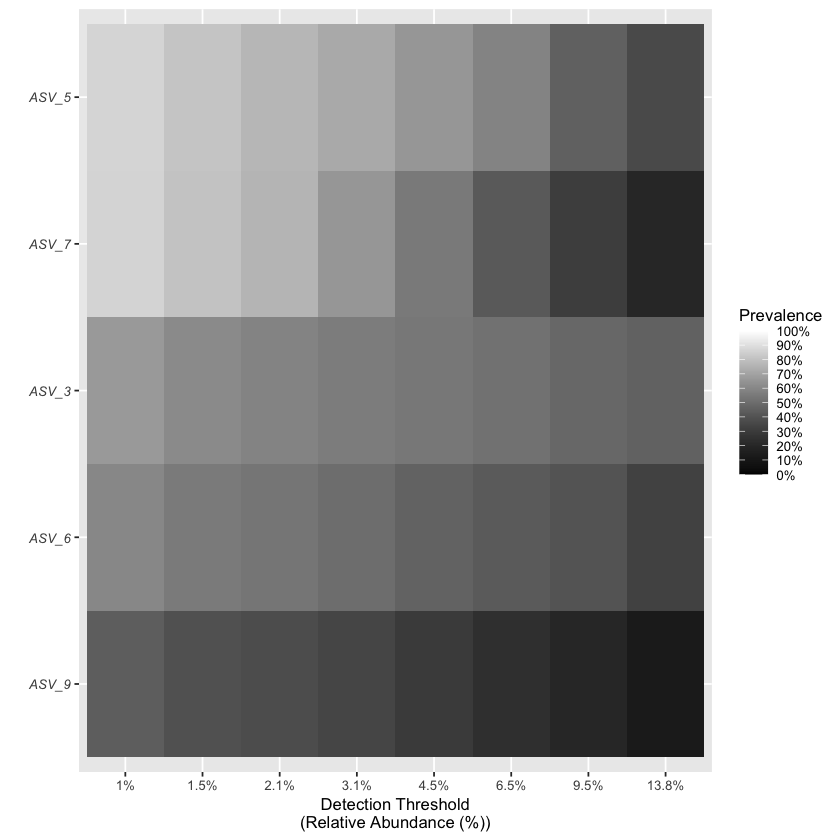

In [40]:
# Core with compositionals:
library(RColorBrewer)
#library(reshape)

prevalences <- seq(.05, 1, .05)

detections <- round(10^seq(log10(0.01), log10(.2), length = 9), 3)

# Also define gray color palette
gray <- gray(seq(0,1,length=5))

#Added pseq.rel, I thin... must be checked if it was in the the rednred version,; where it is initialized
#pseq.rel<- microbiome::transform(pseq, 'compositional')
#min-prevalence gets the 100th highest prevalence
p <- plot_core(pseq.rel,
               plot.type = "heatmap", 
               colours = gray,
               prevalences = prevalences, 
               detections = detections, 
               min.prevalence = prevalence(pseq.rel, sort = TRUE)[100]) +
  labs(x = "Detection Threshold\n(Relative Abundance (%))") +
    
  #Adjusts axis text size and legend bar height
  theme(axis.text.y= element_text(size=8, face="italic"),
        axis.text.x.bottom=element_text(size=8),
        axis.title = element_text(size=10),
        legend.text = element_text(size=8),
        legend.title = element_text(size=10))

print(p)

In [43]:
sum_ps   <- ps_fill %>%
  tax_glom(taxrank = "genus") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


In [44]:
colnames(sum_ps)

[1] "OTU"                   "Sample"                "Abundance"            
 [4] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [7] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
[10] "reef"                  "Genotype"              "Fragment_number"      
[13] "Month"                 "Year"                  "Fragment_num"         
[16] "day"                   "Survey."               "LiveFrag"             
[19] "L"                     "W"                     "H"                    
[22] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[25] "Si.uM."                "NO2.uM."               "N.N.uM."              
[28] "NO3.uM."               "PO4.uM."               "sample_ID"            
[31] "sample_ID2"            "Health"                "Month.x"              
[34] "Samp_trip"             "joining_info"          "sample_order"         
[37] "sample_species"        "time_Reef"             "Cluster"              
[40] "sampling_trip"         "X"                     "colour_reef"          
[43] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[46] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[49] "cluster_depth"         "Year.y"                "Month.y"              
[52] "Lat_decimal"           "Long_decimal"          "avgchla_mgm.3"        
[55] "sdchla_mgm.3"          "avgSST_degC"           "sdSST_degC"           
[58] "domain"                "phylum"                "class"                
[61] "order"                 "family"                "genus"

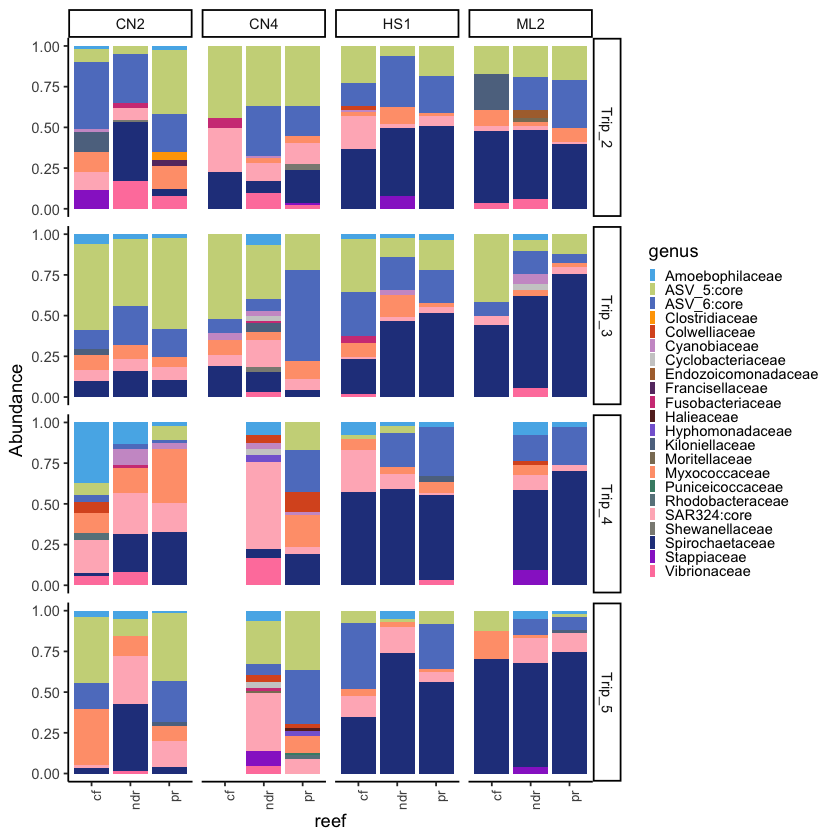

In [45]:
sum_ps %>%
filter(Abundance>=0.1) %>%
#filter(OTU %in% c('ASV_69','ASV_3','ASV_5','ASV_6','ASV_7','ASV_9','ASV_10','ASV_14','ASV_23','ASV_32','ASV_46',
                                                               # 'ASV_50','ASV_54','ASV_56','ASV_62','ASV_65','ASV_82','ASV_85','ASV_95','ASV_110')) %>%
ggplot(aes(x =reef, y=Abundance, fill=genus)) + 
       
geom_bar(stat="identity", position="fill", aes(fill = family)) + 
facet_grid(Samp_trip~Genotype, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=8)) 